In [106]:
import matplotlib.pyplot as plt

def plot_payoff_tasks_finished(df, cols_oi, title=None):
    df_grouped = df.groupby(cols_oi)["payoff_tasks_finished"]
    max = df_grouped.max()
    if len(cols_oi) > 1:
        max = max.unstack()

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the bar chart for each respondent
    max.plot(kind='bar', ax=ax)

    if title:
        plt.title(f'Mean payoff (by tasks finished) across runs ({title})')
    else:
        plt.title(f'Mean payoff (by tasks finished) across runs')
    plt.xlabel('number of allowed links per node')
    plt.ylabel(f'payoff by tasks finished')
    plt.tight_layout()

    plt.show()

def plot_payoff_per_node_avg(df, cols_oi, title=None):
    df_grouped = df.groupby(cols_oi)['payoff_per_node_avg']
    max = df_grouped.max()
    if len(cols_oi) > 1:
        max = max.unstack()

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the bar chart for each respondent
    max.plot(kind='bar', ax=ax)

    if title:
        plt.title(f'Mean payoff (by nodes) across runs ({title})')
    else:
        plt.title(f'Mean payoff (by nodes) across runs')
    plt.xlabel('number of allowed links per node')
    plt.ylabel(f'payoff by nodes')
    plt.tight_layout()

    plt.show()

def plot_diff_hired_fired(df, cols_oi, title=None):
    df_grouped = df.groupby(cols_oi)['fired']
    mean_fired = df_grouped.max()
    if len(cols_oi) > 1:
        mean_fired = mean_fired.unstack()

    df_grouped = df.groupby(cols_oi)['hired']
    mean_hired = df_grouped.max()
    if len(cols_oi) > 1:
        mean_hired = mean_hired.unstack()

    diff = mean_hired - mean_fired

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the bar chart for each respondent
    diff.plot(kind='barh', ax=ax)

    if title:
        plt.title(f'Number of Hired Nodes - Number of Fired Nodes ({title})')
    else:
        plt.title(f'Number of Hired Nodes - Number of Fired Nodes')
    plt.xlabel('number of allowed links per node')
    plt.ylabel(f'Number of Hired Nodes - Number of Fired Nodes')
    plt.tight_layout()

    plt.show()

def plot_number_of_hired_and_fired_nodes(df, cols_oi, title=None):
    # Grouping and aggregation
    df_grouped_fired = df.groupby(cols_oi)['fired'].max()
    if len(cols_oi) > 1:
        df_grouped_fired = df_grouped_fired.unstack()

    df_grouped_hired = df.groupby(cols_oi)['hired'].max()
    if len(cols_oi) > 1:
        df_grouped_hired = df_grouped_hired.unstack()

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    # Reverse values for fired to make the bar chart two-sided
    df_grouped_fired = -df_grouped_fired

    # Plot bars
    df_grouped_hired.plot(kind='barh', ax=ax)
    df_grouped_fired.plot(kind='barh', ax=ax)

    # Adjust aesthetics
    ax.set_xlabel('Number of Hired or Fired (Negative) Nodes')

    if title:
        ax.set_title(f'Number of Hired and Fired Nodes ({title})')
    else:
        ax.set_title(f'Number of Hired and Fired Nodes')
    if len(cols_oi) > 1:
        ax.legend(df[cols_oi[-1]].unique(), loc='upper right', title='Meeting Frequency')
    else:
        ax.set_ylabel('Number of Allowed Links per Node')

    plt.tight_layout()
    plt.show()

In [107]:
import pandas as pd

file_path = "../experiments/tables/new2 FINAL-table.csv"

# read the csv file but skip the first 6 lines
df_1 = pd.read_csv(file_path, skiprows=6)

cols_oi_1 = ['num_links', 'meeting-freq']

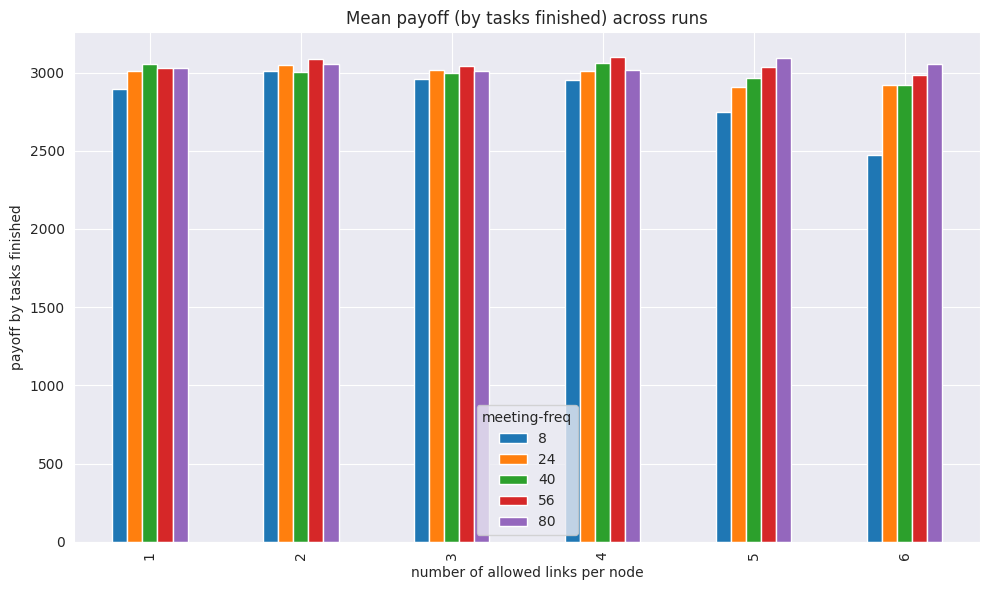

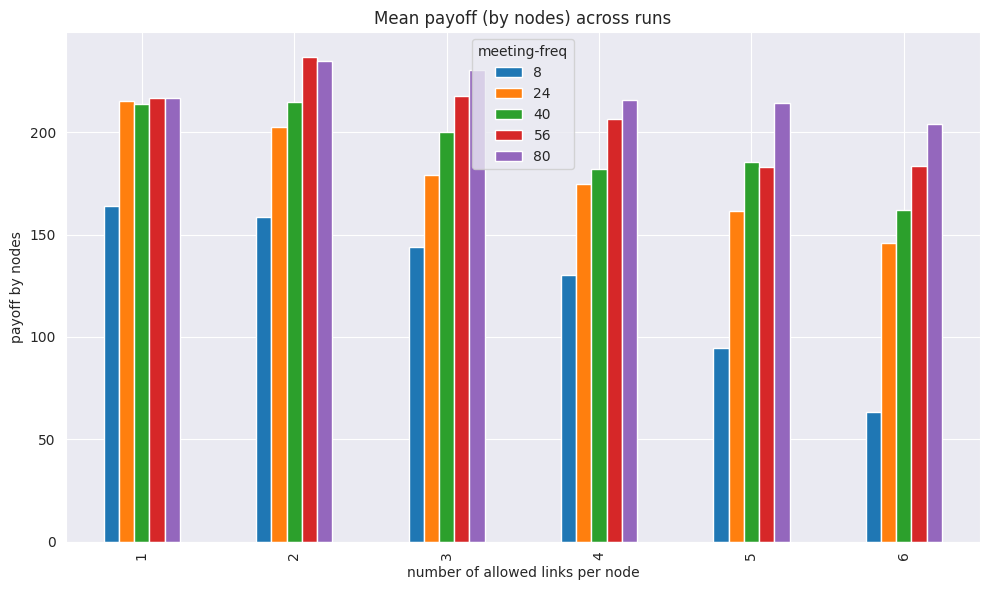

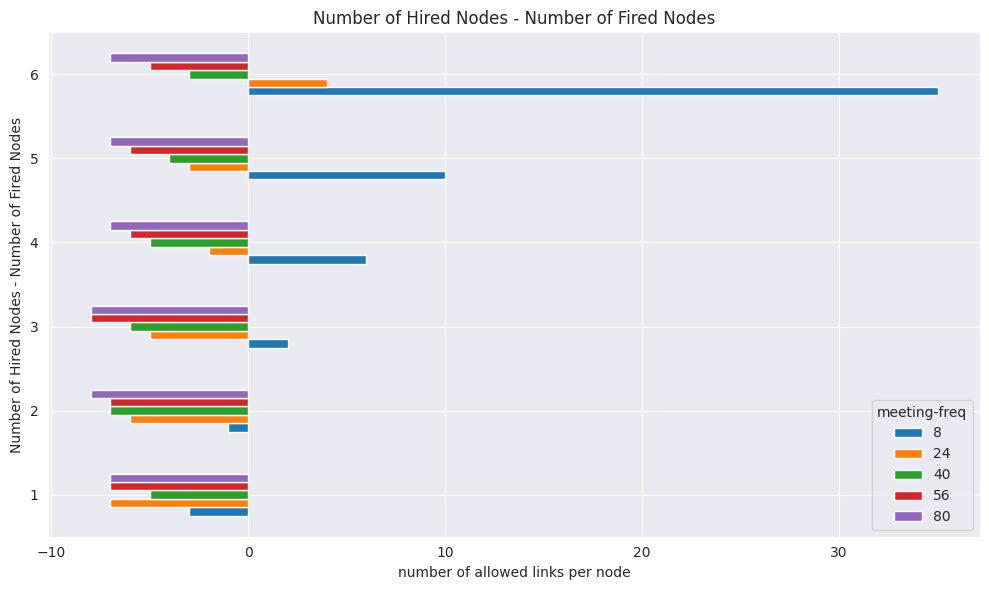

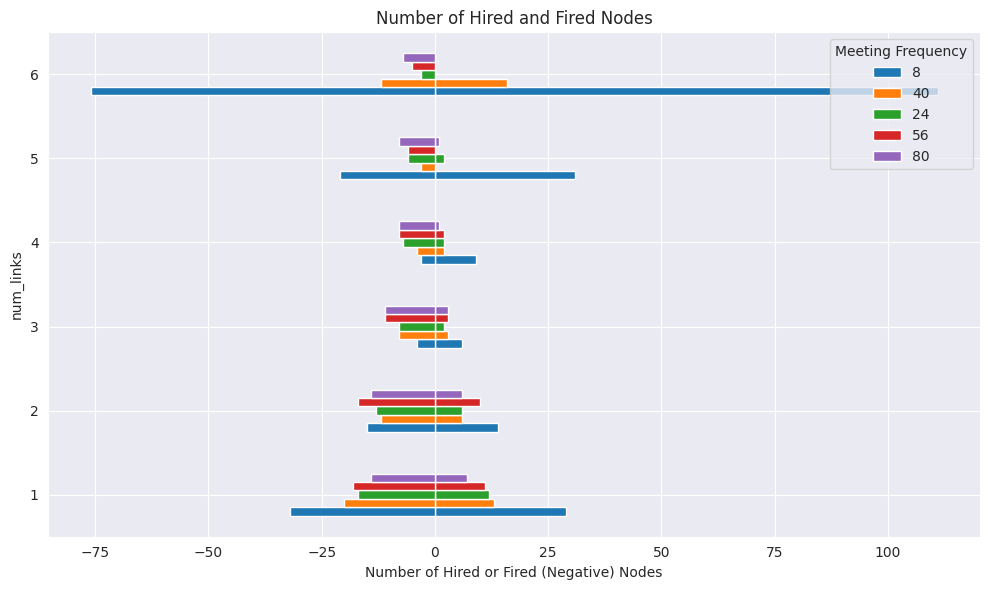

In [108]:
plot_payoff_tasks_finished(df_1, cols_oi_1)
plot_payoff_per_node_avg(df_1, cols_oi_1)
plot_diff_hired_fired(df_1, cols_oi_1)
plot_number_of_hired_and_fired_nodes(df_1, cols_oi_1)

In [109]:
file_path = "../experiments/tables/new2 FINAL_MEETINGS_OFF-table.csv"

# read the csv file but skip the first 6 lines
df_2 = pd.read_csv(file_path, skiprows=6)

cols_oi_2 = ['num_links']

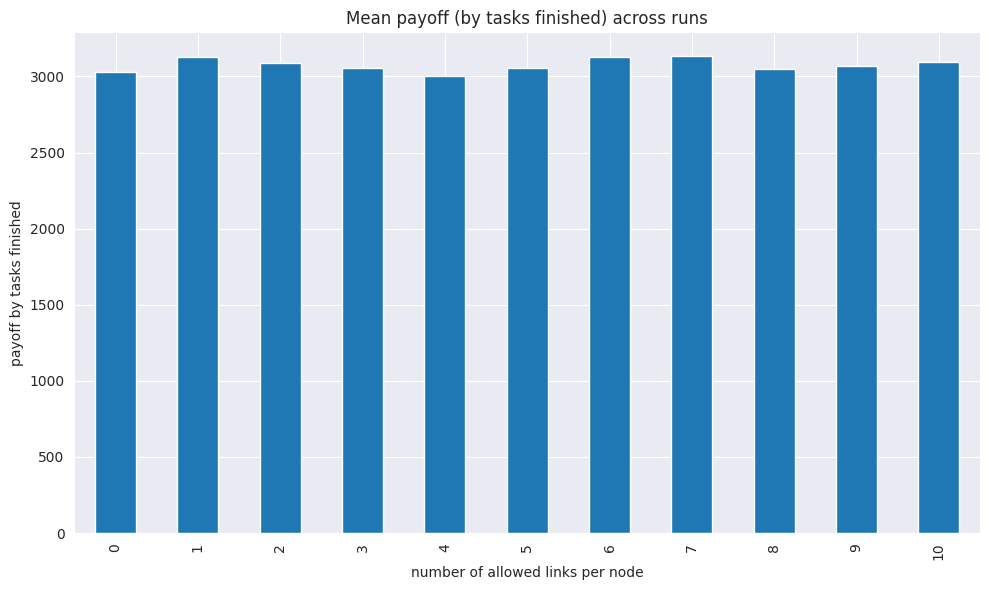

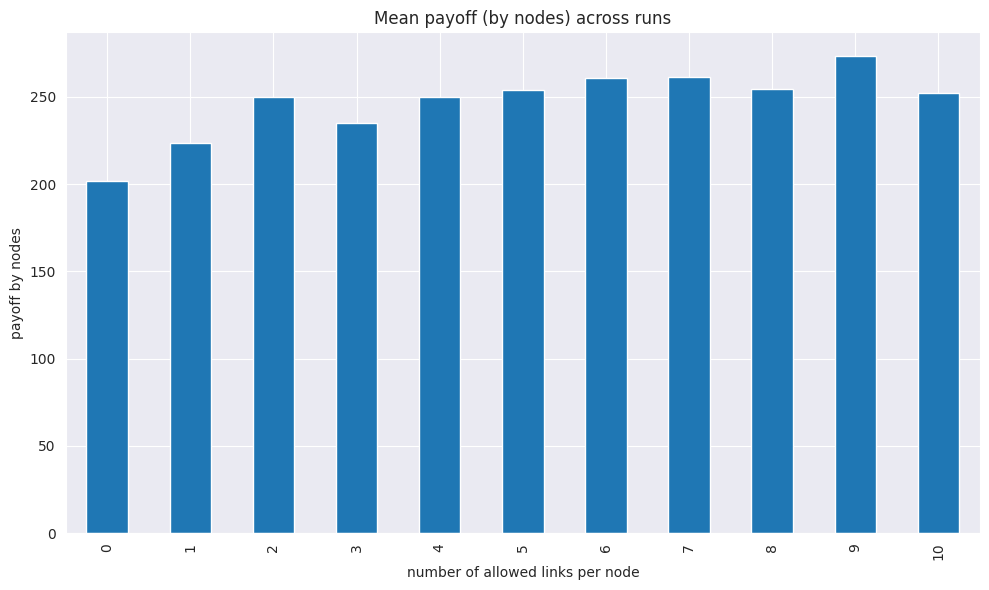

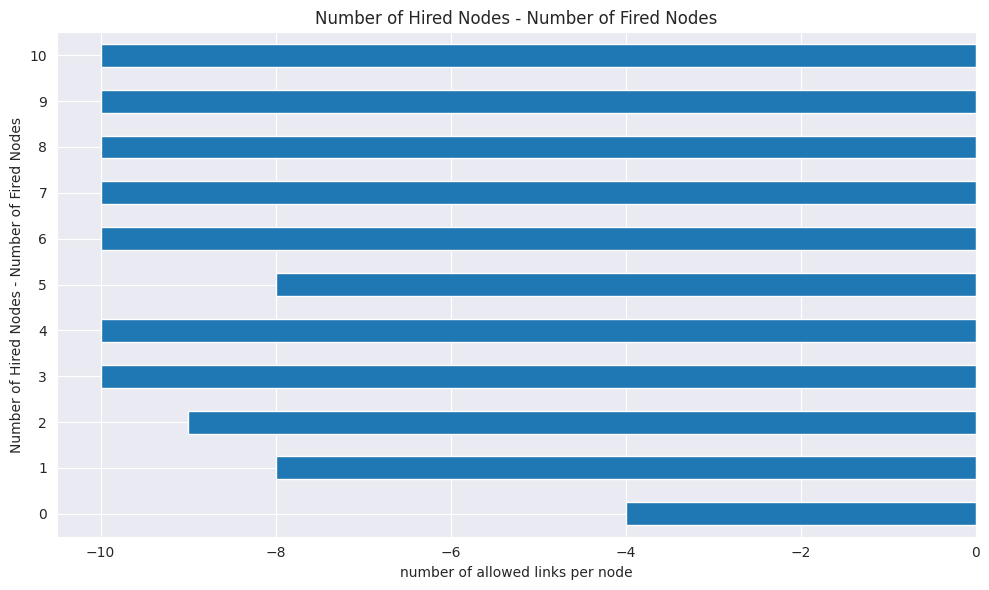

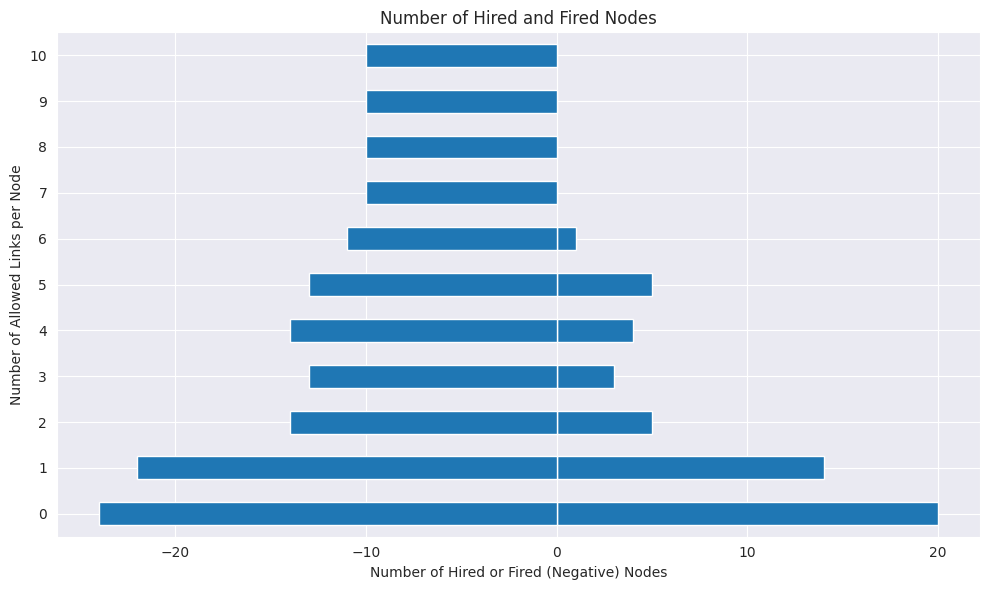

In [110]:
plot_payoff_tasks_finished(df_2, cols_oi_2)
plot_payoff_per_node_avg(df_2, cols_oi_2)
plot_diff_hired_fired(df_2, cols_oi_2)
plot_number_of_hired_and_fired_nodes(df_2, cols_oi_2)

# Sensitivity Analysis
## Changing the learning rate wrt. the number of links and meeting frequency

In [116]:
import pandas as pd

file_path = "../experiments/tables/new2 FINAL_SENSITIV_LR-table.csv"

# read the csv file but skip the first 6 lines
df_1 = pd.read_csv(file_path, skiprows=6)

cols_oi_1 = ['num_links', 'meeting-freq']
sens_param = 'alpha'

print("Unique values of the sensitivity parameter:")
print(df_1['alpha'].unique())

print("Unique values of the other parameters:")
print("num_links: ", df_1['num_links'].unique())
print("meeting-freq: ", df_1['meeting-freq'].unique())



Unique values of the sensitivity parameter:
[0.05 0.1  0.15 0.2 ]
Unique values of the other parameters:
num_links:  [2 4 6]
meeting-freq:  [80  8 40]


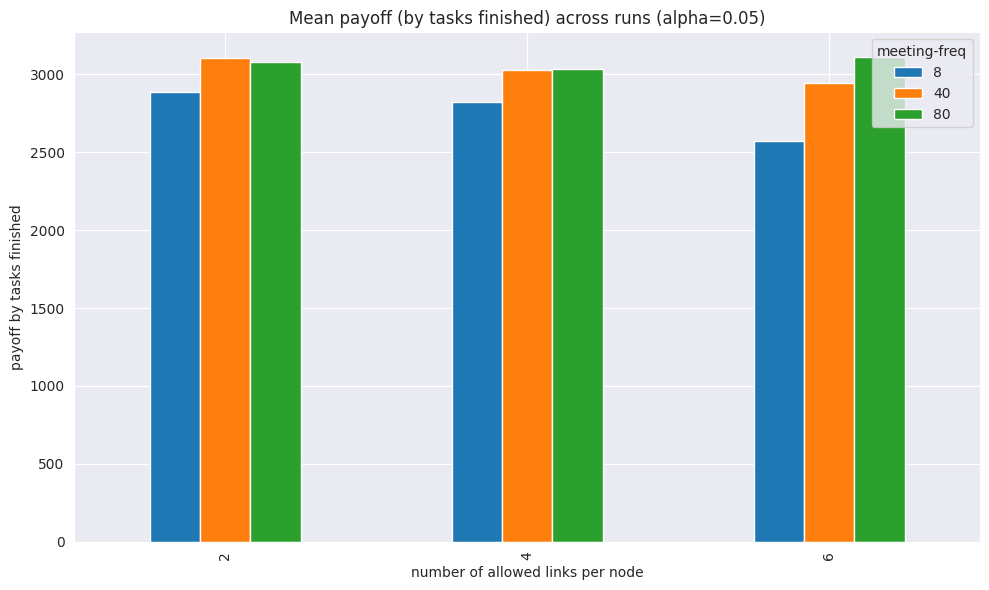

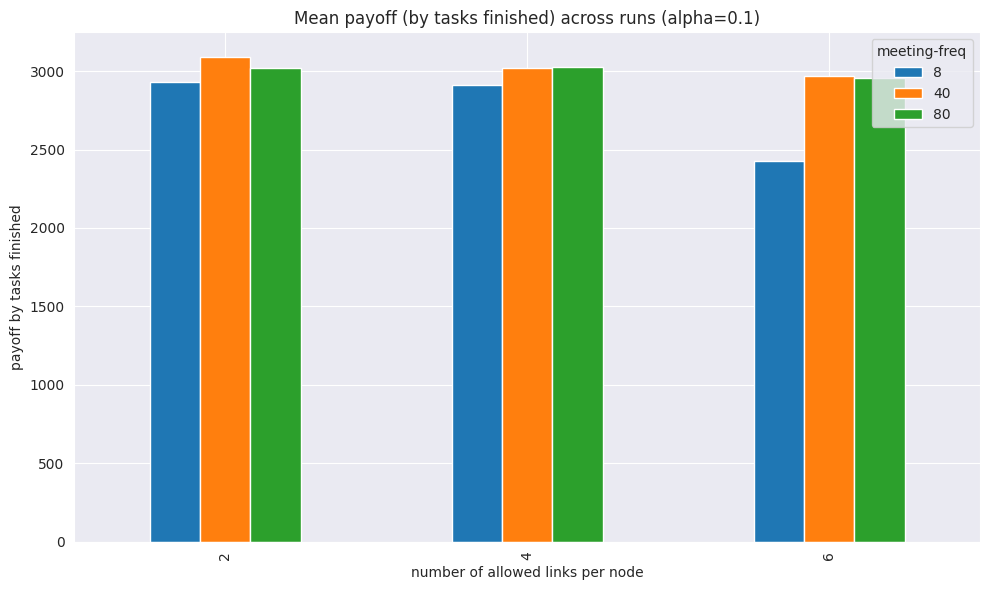

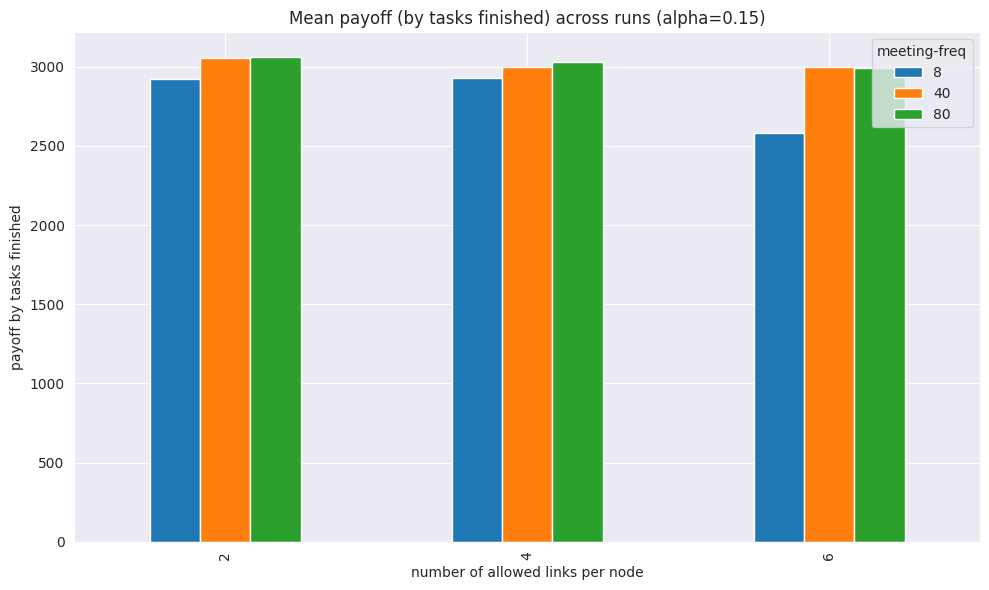

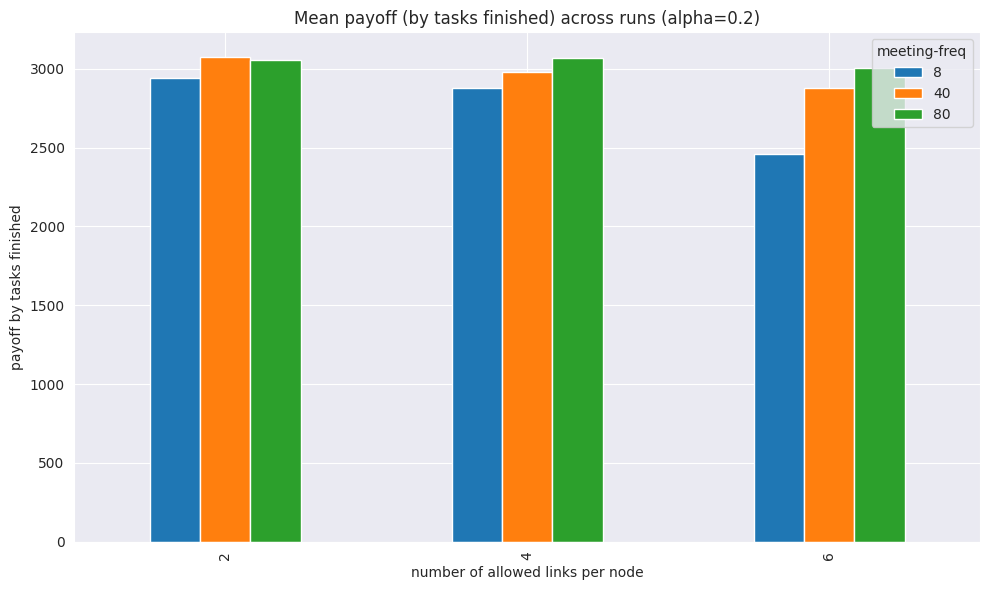

In [112]:
for val in df_1[sens_param].unique():
    df = df_1[df_1[sens_param] == val]
    plot_payoff_tasks_finished(df, cols_oi_1, title=f'{sens_param}={val}')

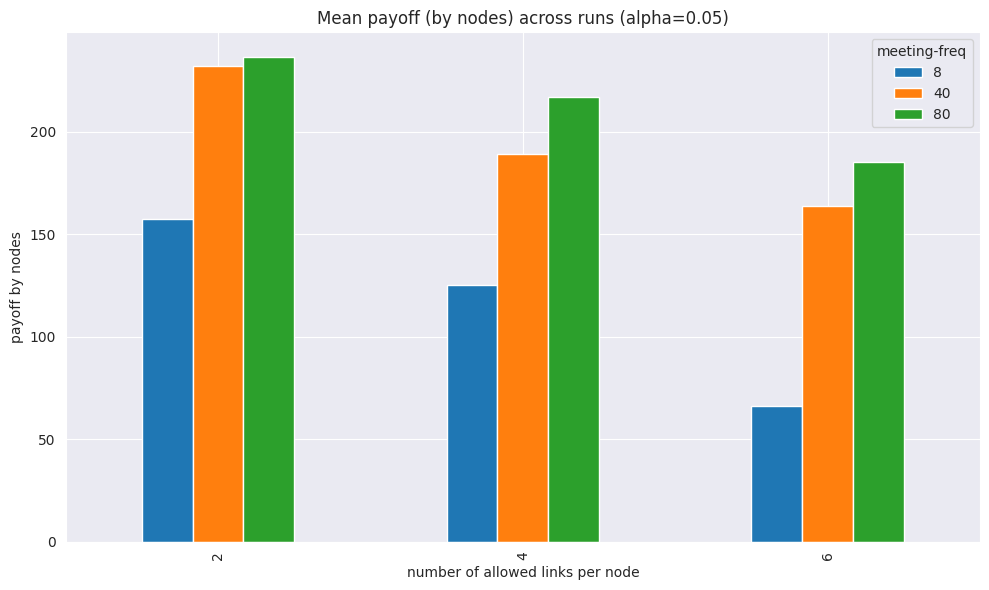

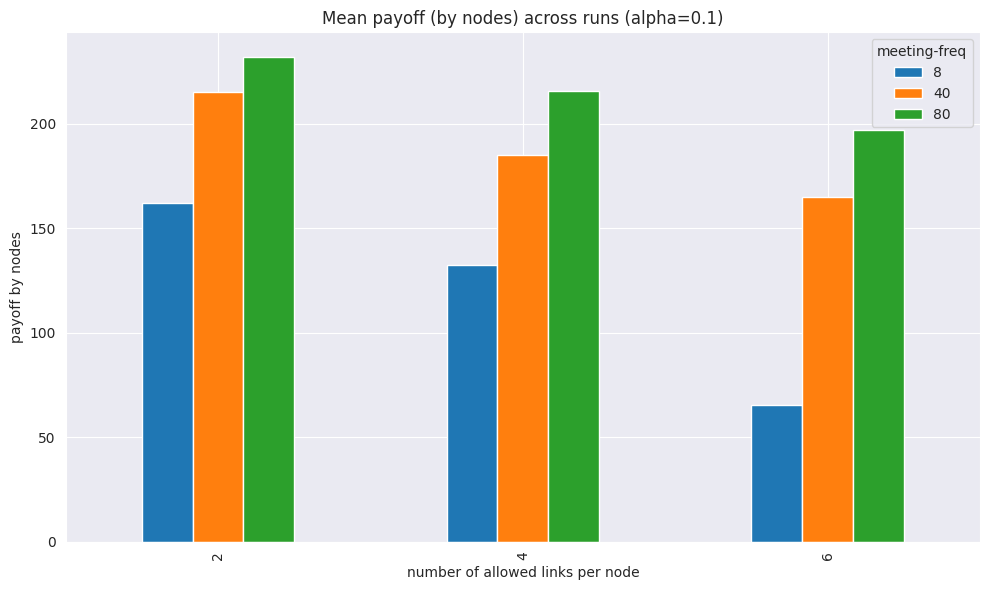

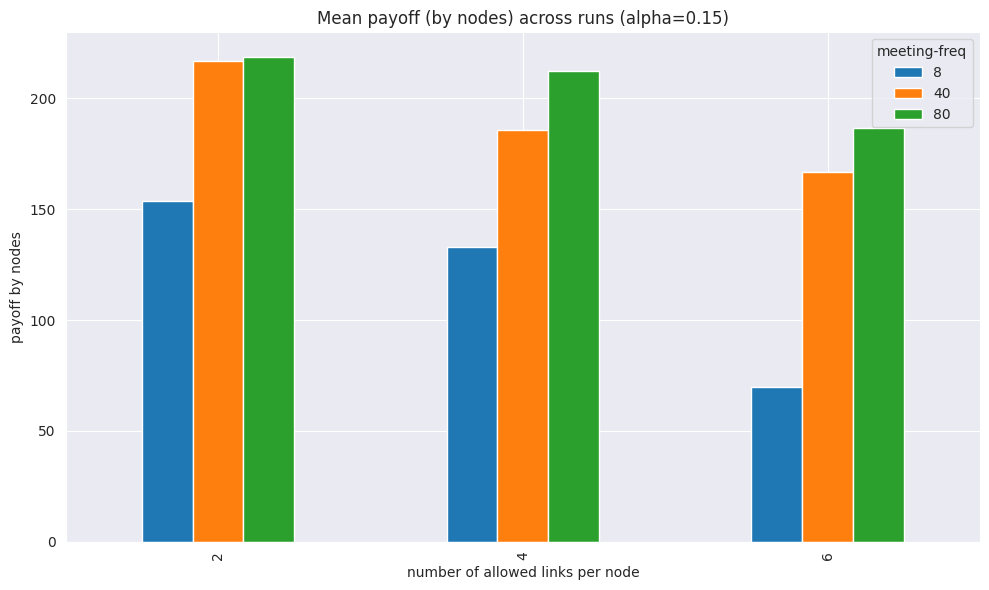

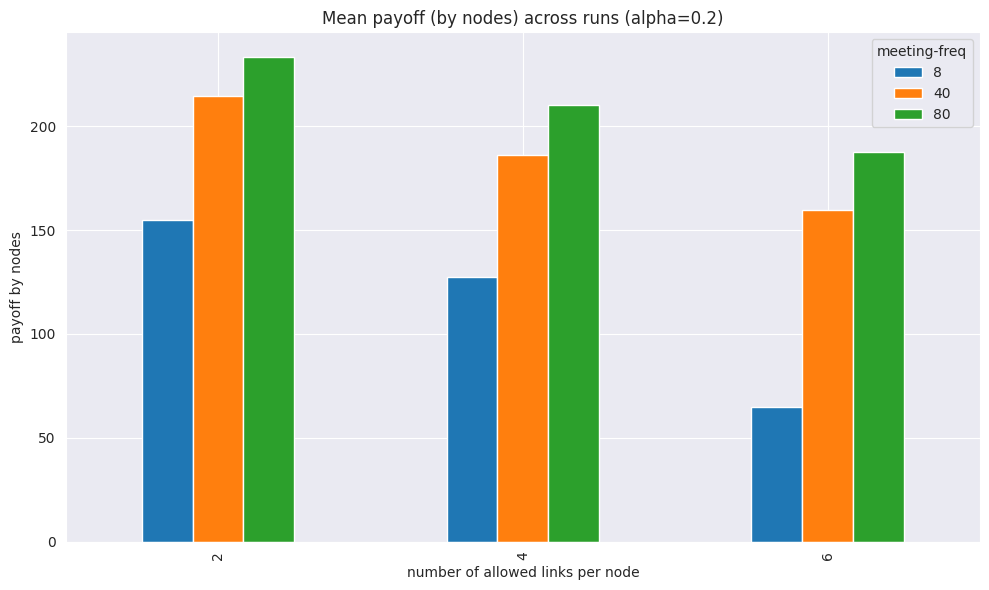

In [113]:
for val in df_1[sens_param].unique():
    df = df_1[df_1[sens_param] == val]
    plot_payoff_per_node_avg(df, cols_oi_1, title=f'{sens_param}={val}')

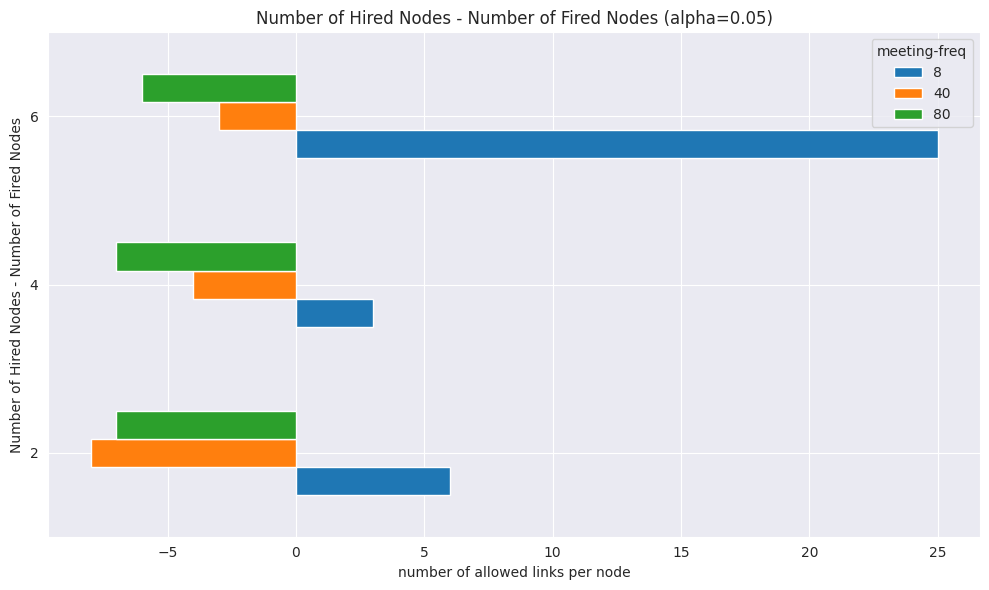

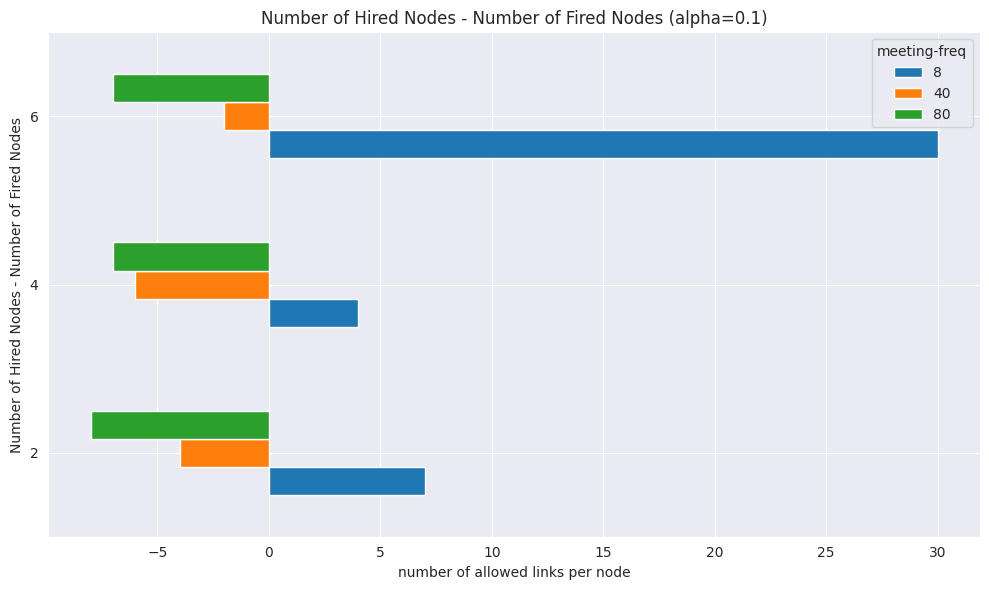

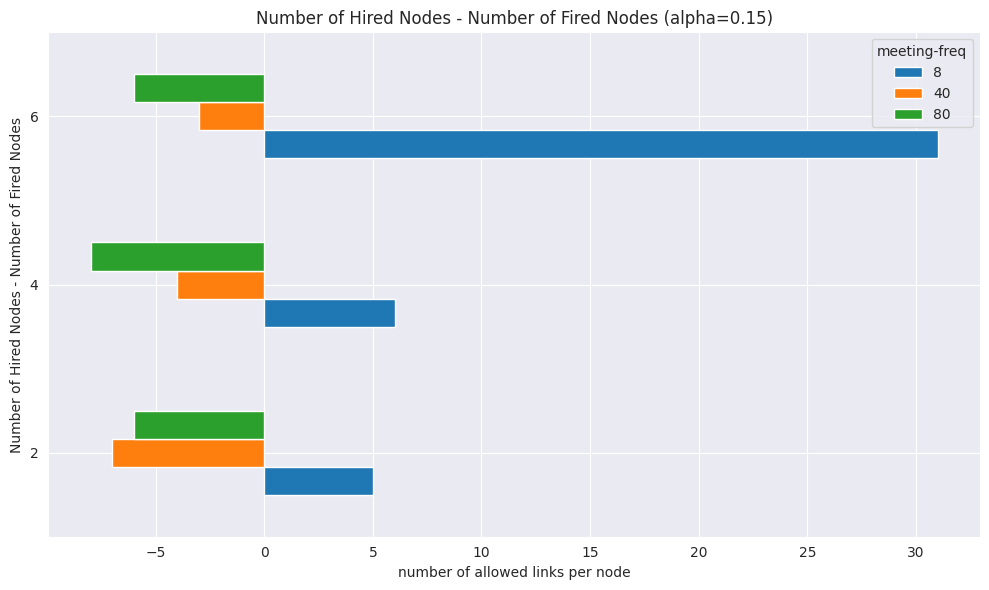

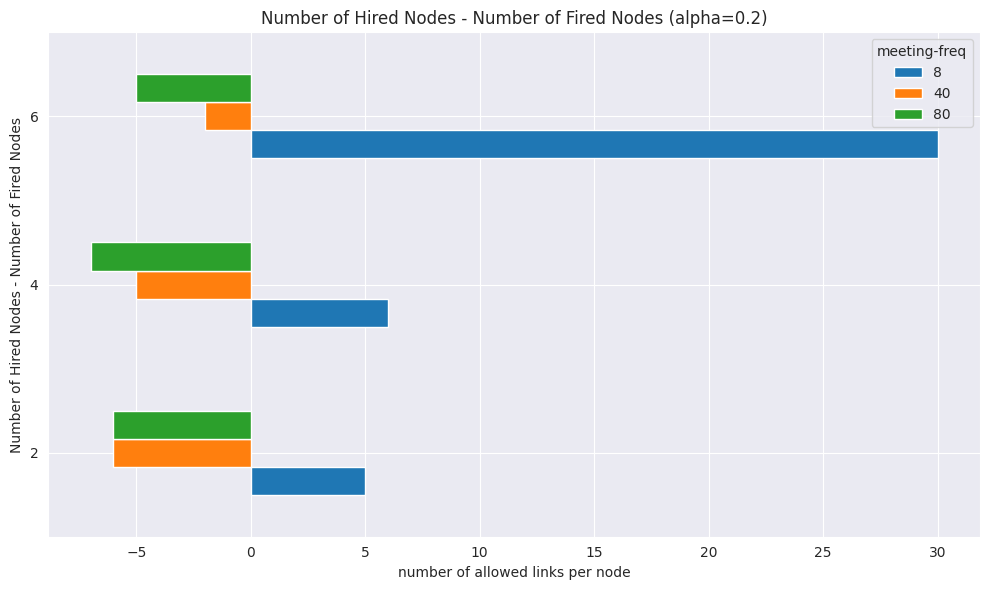

In [114]:
for val in df_1[sens_param].unique():
    df = df_1[df_1[sens_param] == val]
    plot_diff_hired_fired(df, cols_oi_1, title=f'{sens_param}={val}')

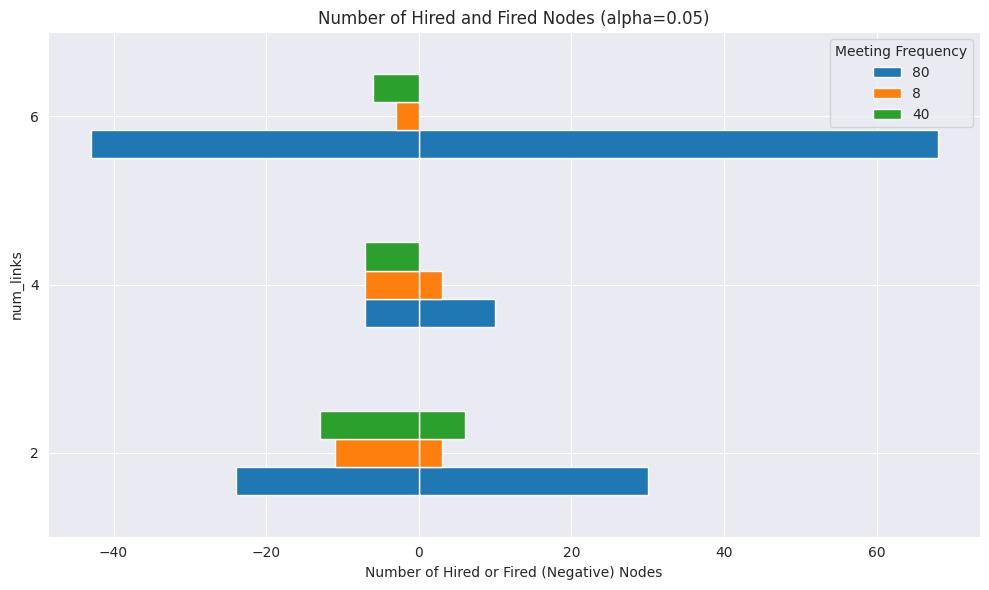

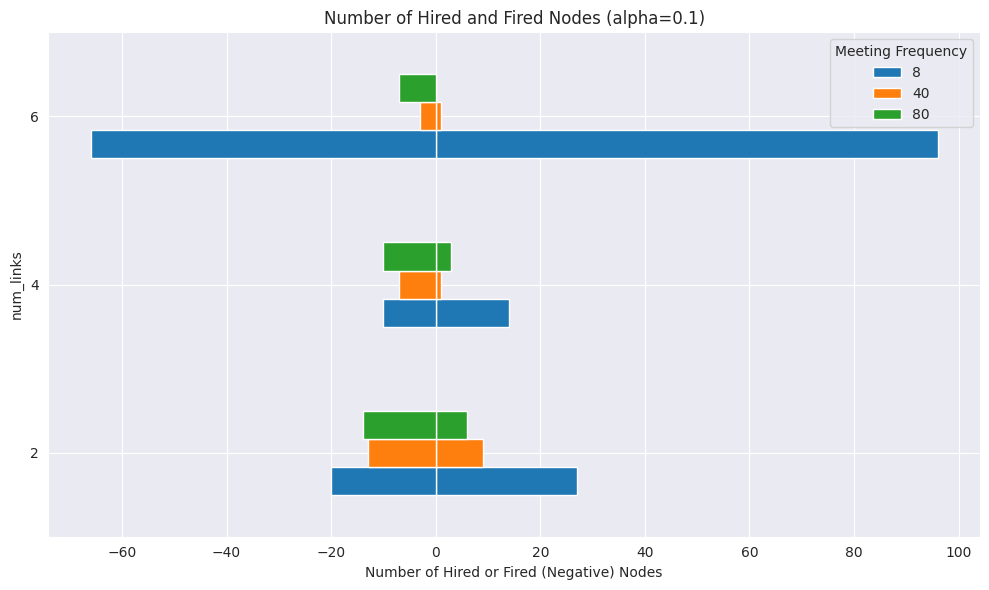

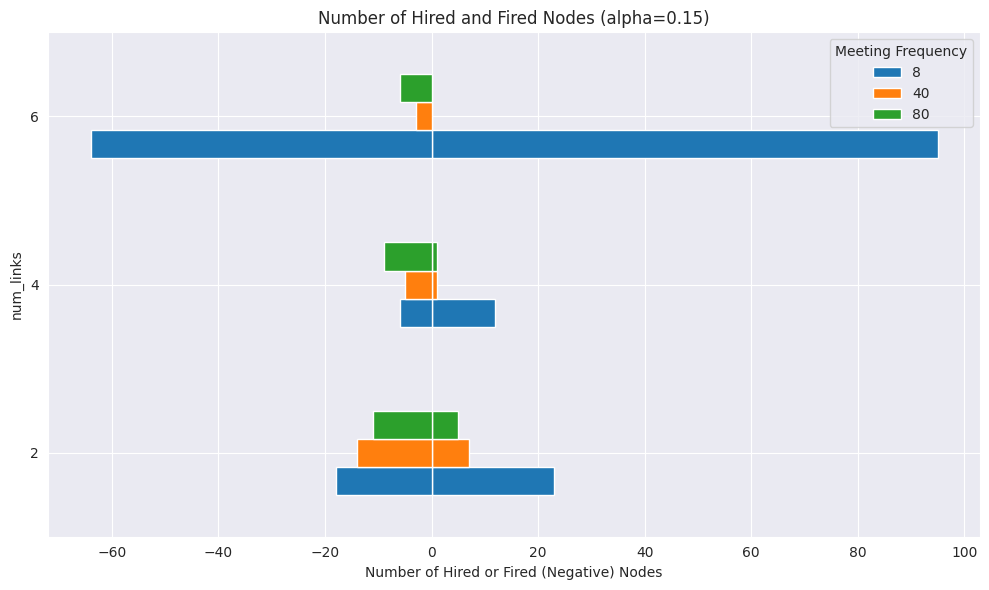

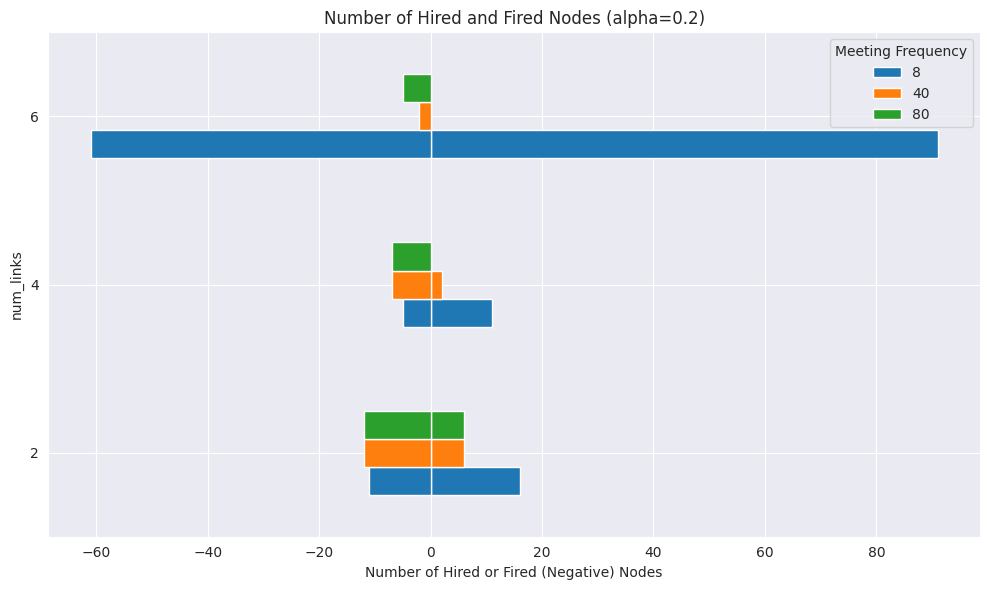

In [115]:
for val in df_1[sens_param].unique():
    df = df_1[df_1[sens_param] == val]
    plot_number_of_hired_and_fired_nodes(df, cols_oi_1, title=f'{sens_param}={val}')

# Sensitivity Analysis
## Changing the max idel time wrt. the number of links and meeting frequency

In [141]:
import pandas as pd

file_path = "../experiments/tables/new2 FINAL_SENSITIV_IDLETIME-table.csv"

# read the csv file but skip the first 6 lines
df_1 = pd.read_csv(file_path, skiprows=6)

cols_oi_1 = ['num_links', 'meeting-freq']
sens_param = 'max-idle-time'

print("Unique values of the sensitivity parameter:")
print("max-idle-time: ", df_1['max-idle-time'].unique())

print("Unique values of the other parameters:")
print("num_links: ", df_1['num_links'].unique())
print("meeting-freq: ", df_1['meeting-freq'].unique())

Unique values of the sensitivity parameter:
max-idle-time:  [16 40 56 80]
Unique values of the other parameters:
num_links:  [2 4 6]
meeting-freq:  [80 40  8]


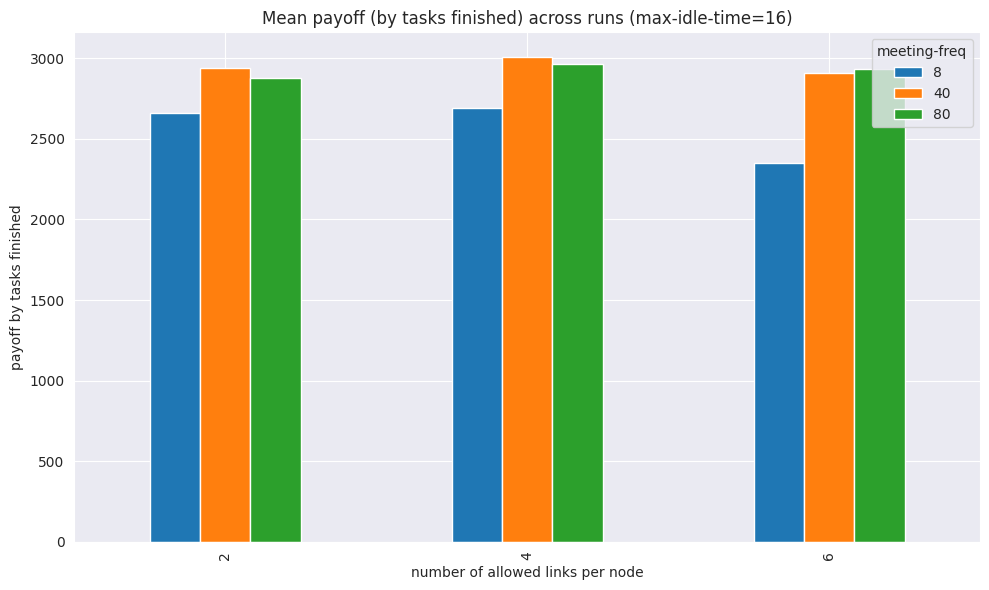

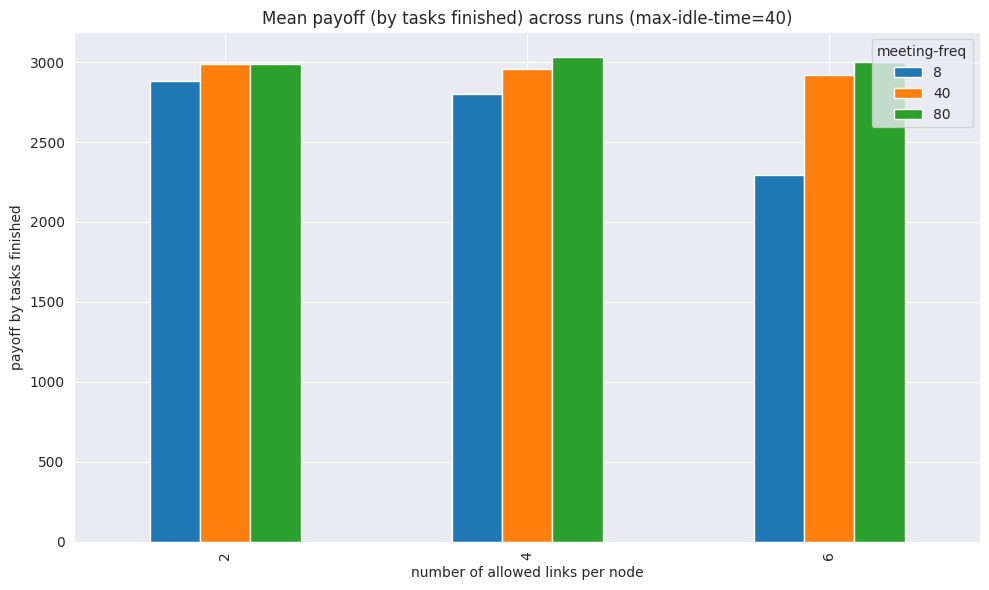

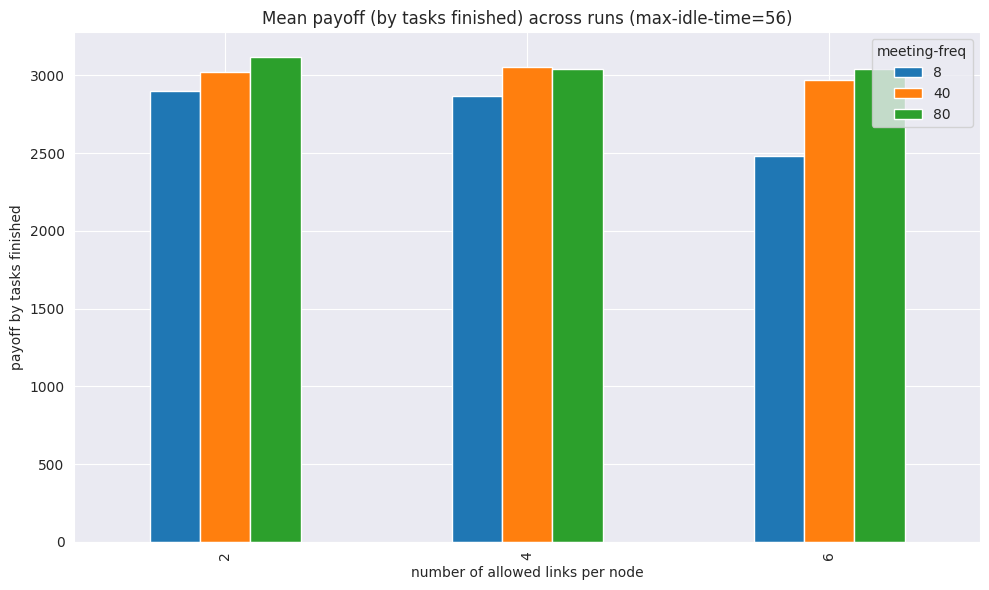

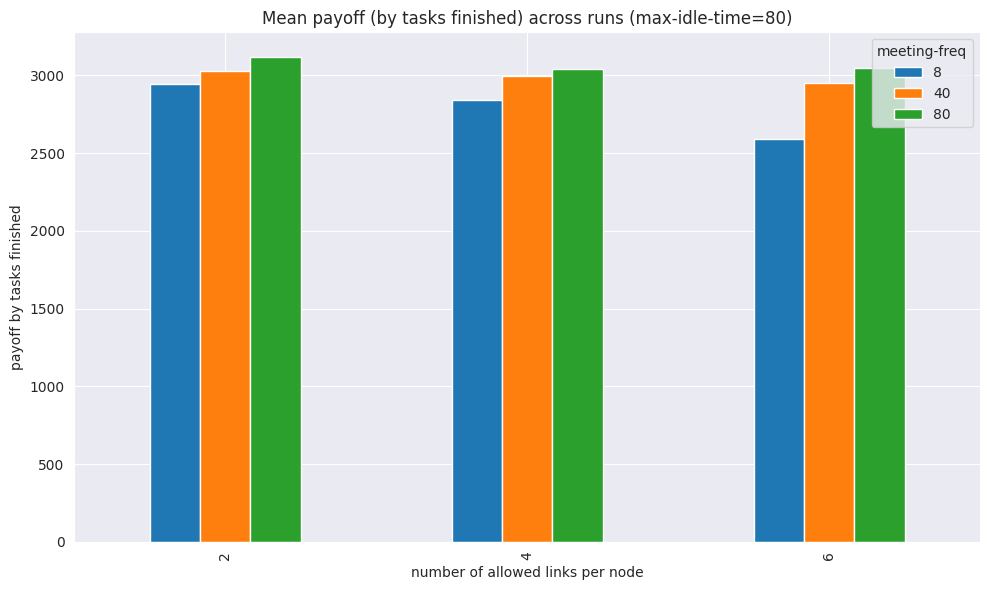

In [142]:
for val in df_1[sens_param].unique():
    df = df_1[df_1[sens_param] == val]
    plot_payoff_tasks_finished(df, cols_oi_1, title=f'{sens_param}={val}')

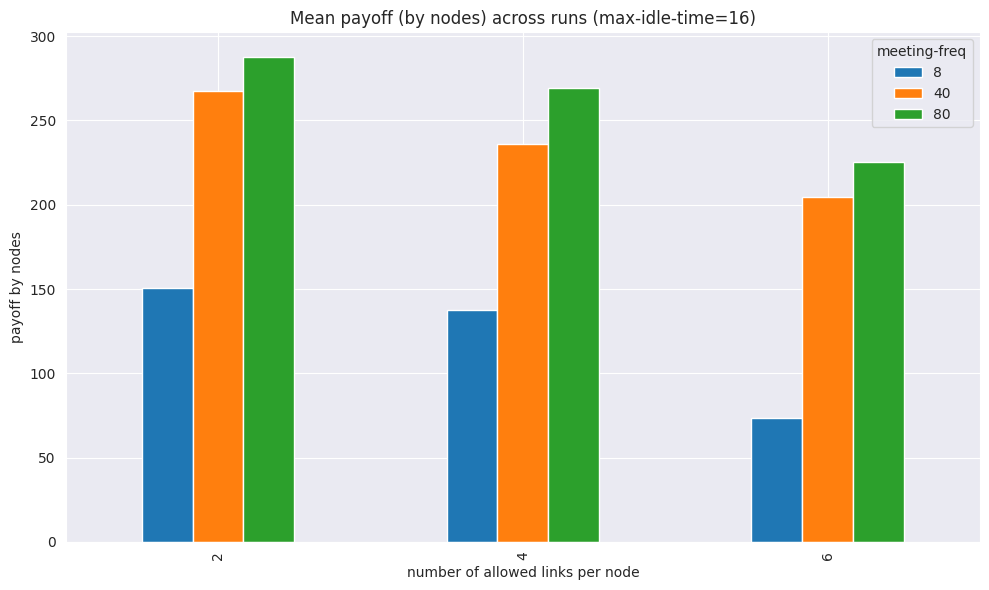

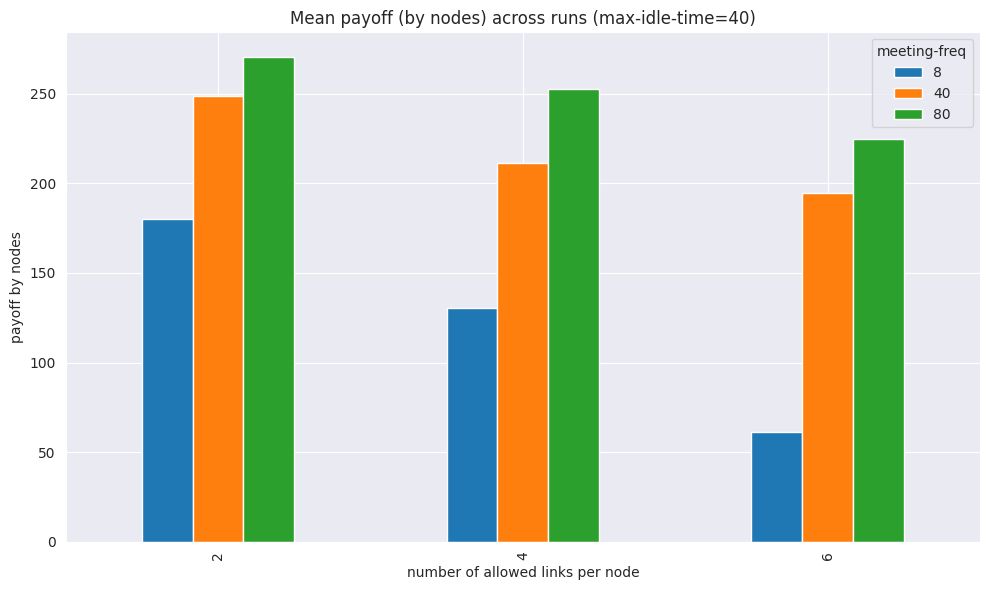

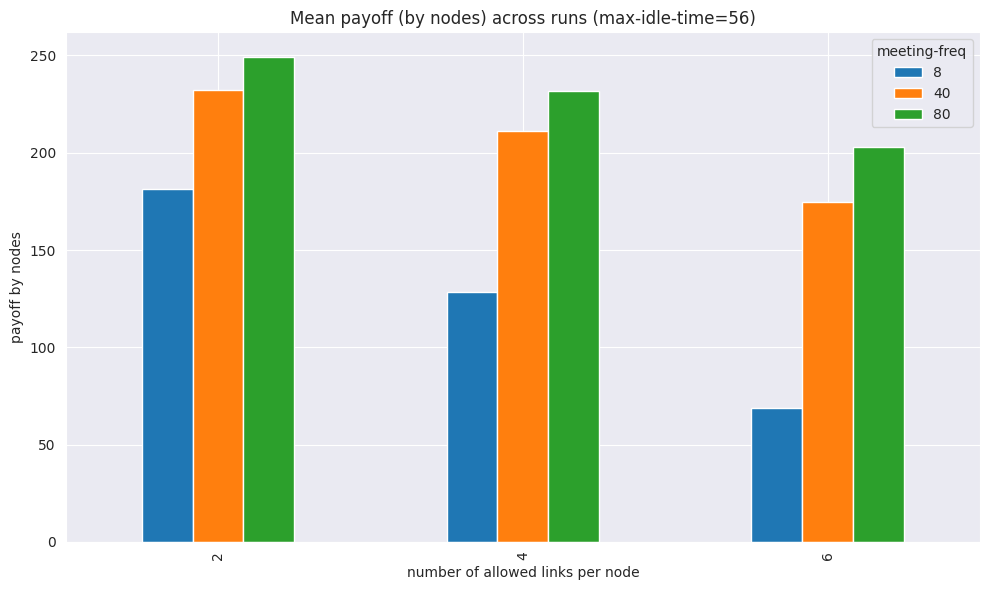

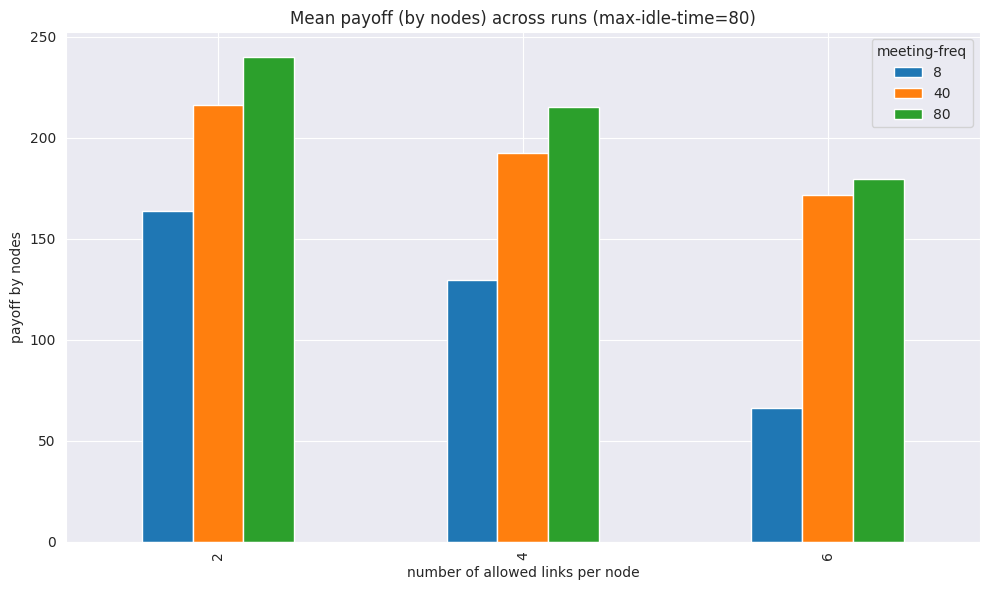

In [143]:
for val in df_1[sens_param].unique():
    df = df_1[df_1[sens_param] == val]
    plot_payoff_per_node_avg(df, cols_oi_1, title=f'{sens_param}={val}')

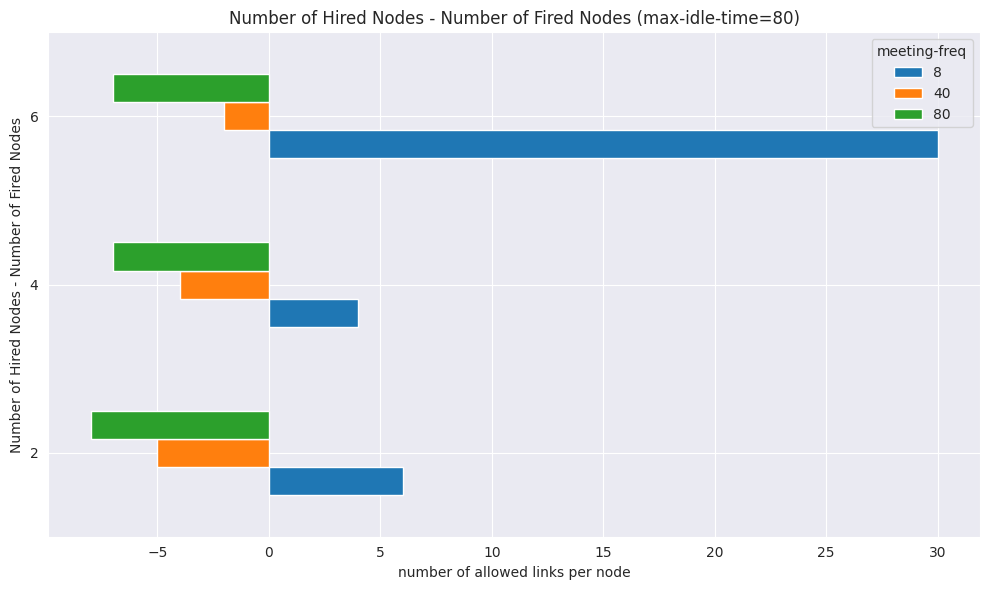

In [134]:
for val in df_1[sens_param].unique():
    df = df_1[df_1[sens_param] == val]
    plot_diff_hired_fired(df, cols_oi_1, title=f'{sens_param}={val}')

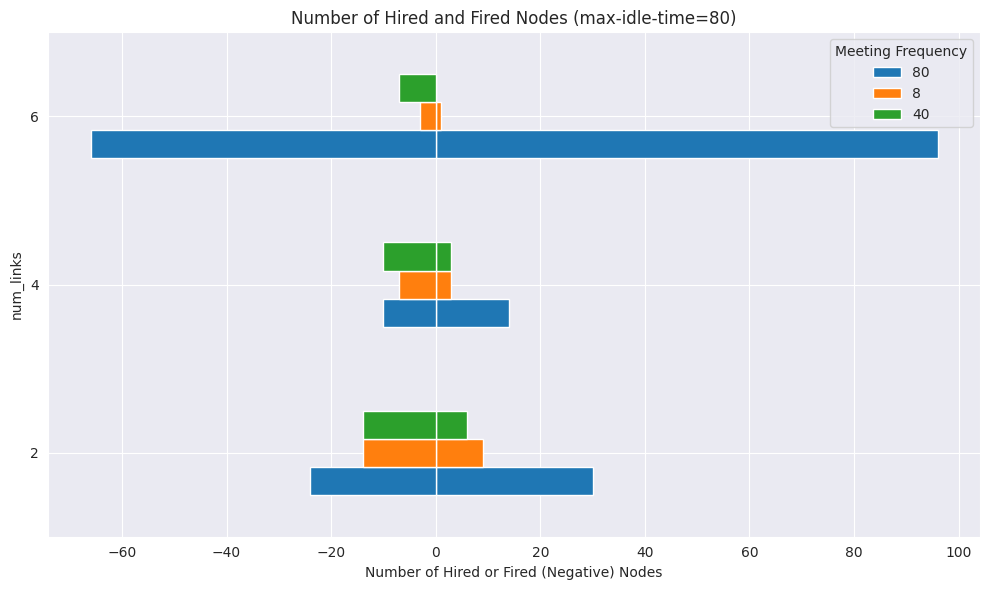

In [135]:
for val in df_1[sens_param].unique():
    df = df_1[df_1[sens_param] == val]
    plot_number_of_hired_and_fired_nodes(df, cols_oi_1, title=f'{sens_param}={val}')

In [136]:
import pandas as pd

file_path = "../experiments/tables/new2 FINAL_SENSITIV_NUM_NODES-table.csv"

# read the csv file but skip the first 6 lines
df_1 = pd.read_csv(file_path, skiprows=6)

cols_oi_1 = ['num_links', 'meeting-freq']
sens_param = 'number-of-nodes'

print("Unique values of the sensitivity parameter:")
print("number-of-nodes: ", df_1['number-of-nodes'].unique())

print("Unique values of the other parameters:")
print("num_links: ", df_1['num_links'].unique())
print("meeting-freq: ", df_1['meeting-freq'].unique())

Unique values of the sensitivity parameter:
number-of-nodes:  [10 20 30]
Unique values of the other parameters:
num_links:  [2 4 6]
meeting-freq:  [ 8 40 80]


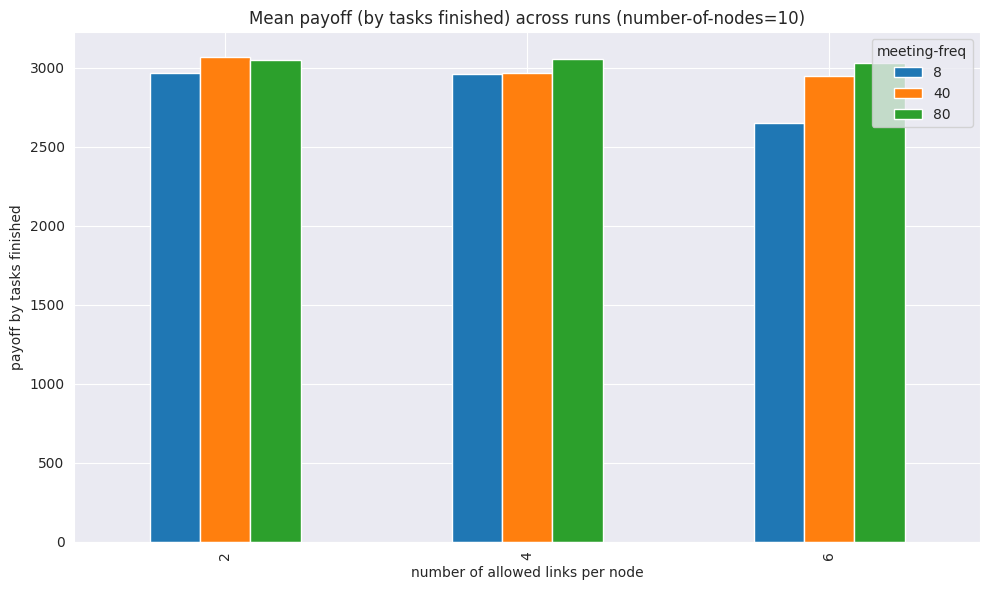

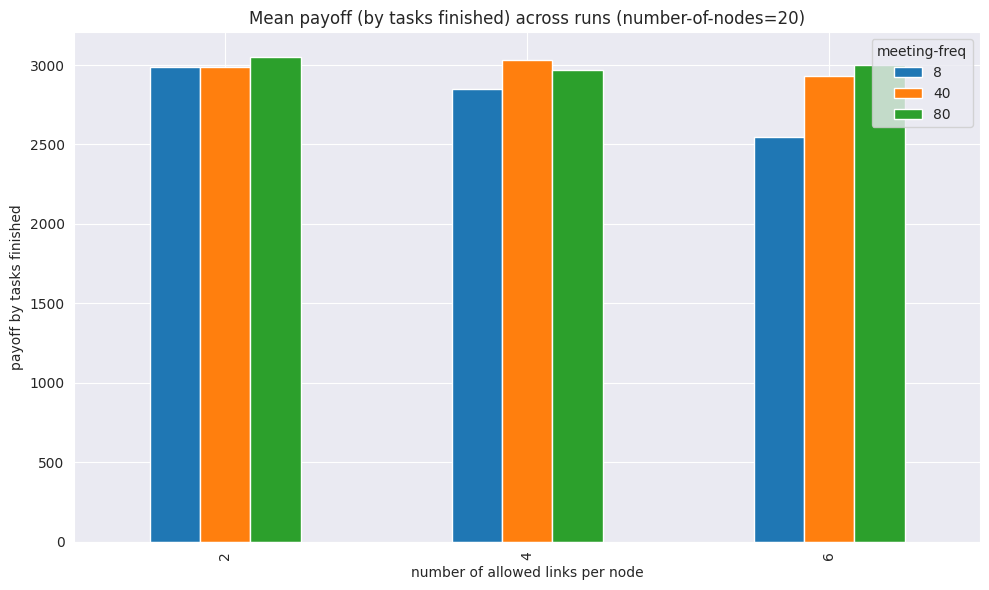

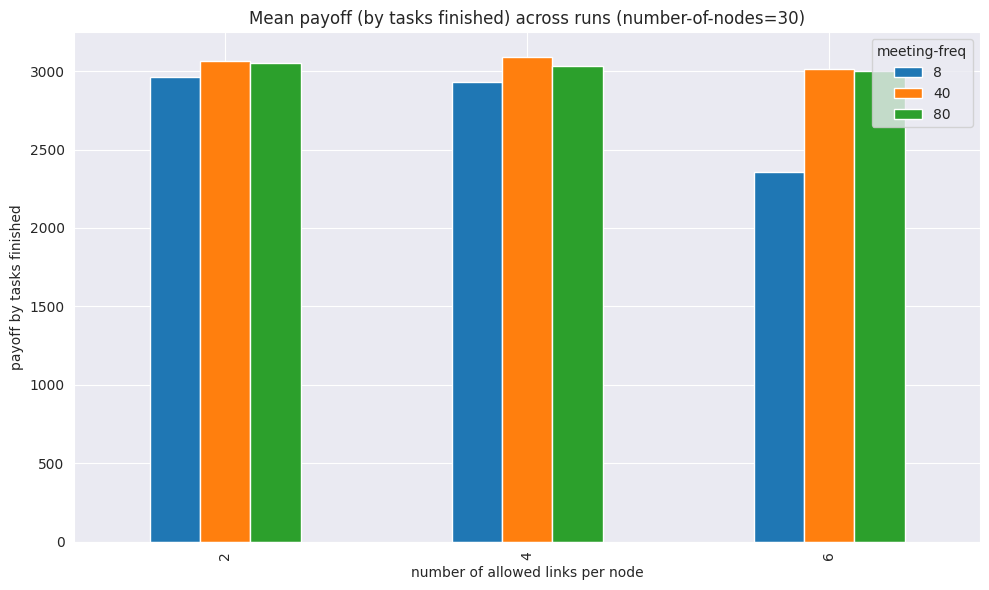

In [137]:
for val in df_1[sens_param].unique():
    df = df_1[df_1[sens_param] == val]
    plot_payoff_tasks_finished(df, cols_oi_1, title=f'{sens_param}={val}')

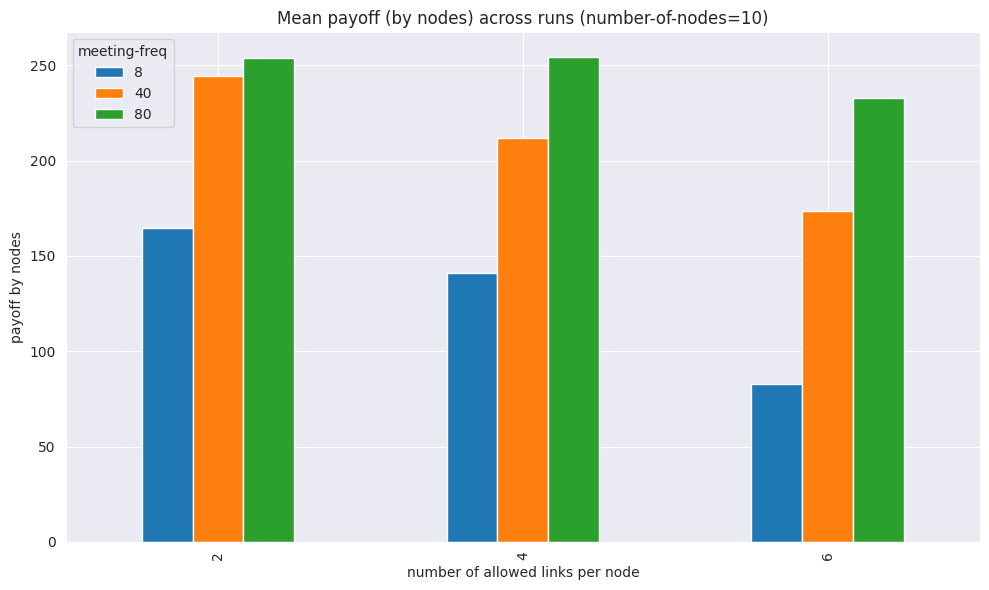

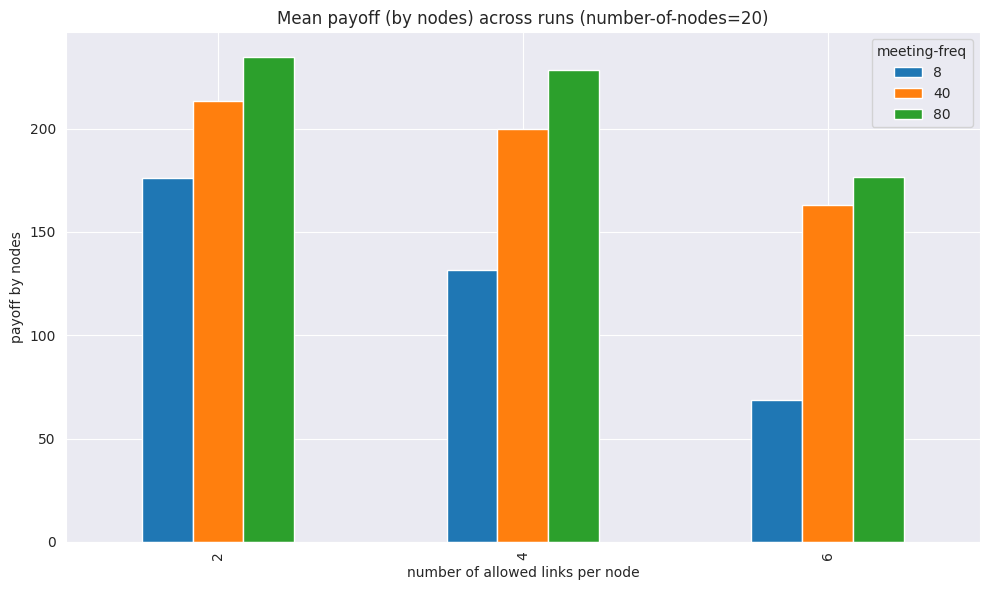

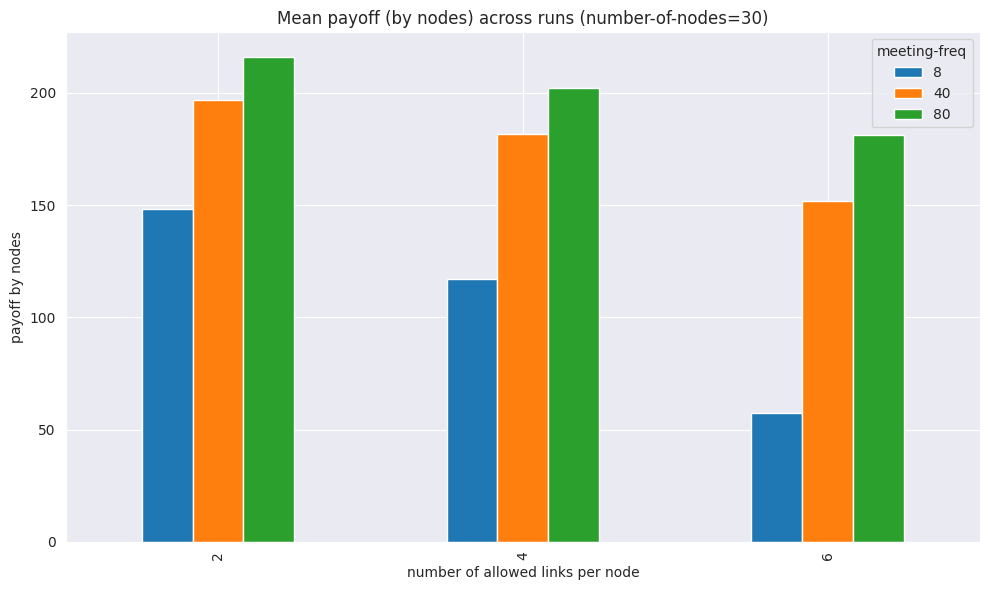

In [138]:
for val in df_1[sens_param].unique():
    df = df_1[df_1[sens_param] == val]
    plot_payoff_per_node_avg(df, cols_oi_1, title=f'{sens_param}={val}')

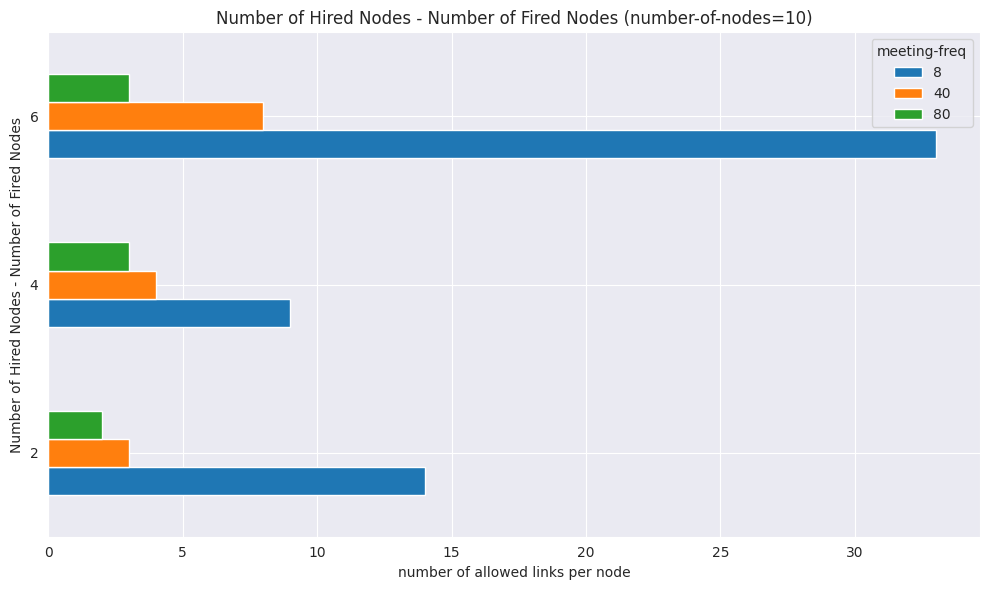

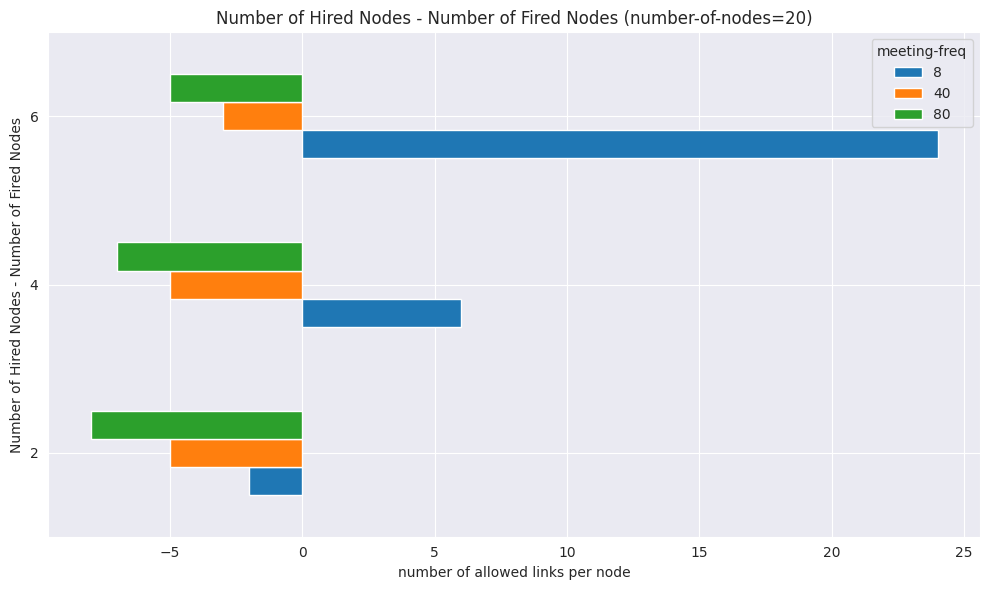

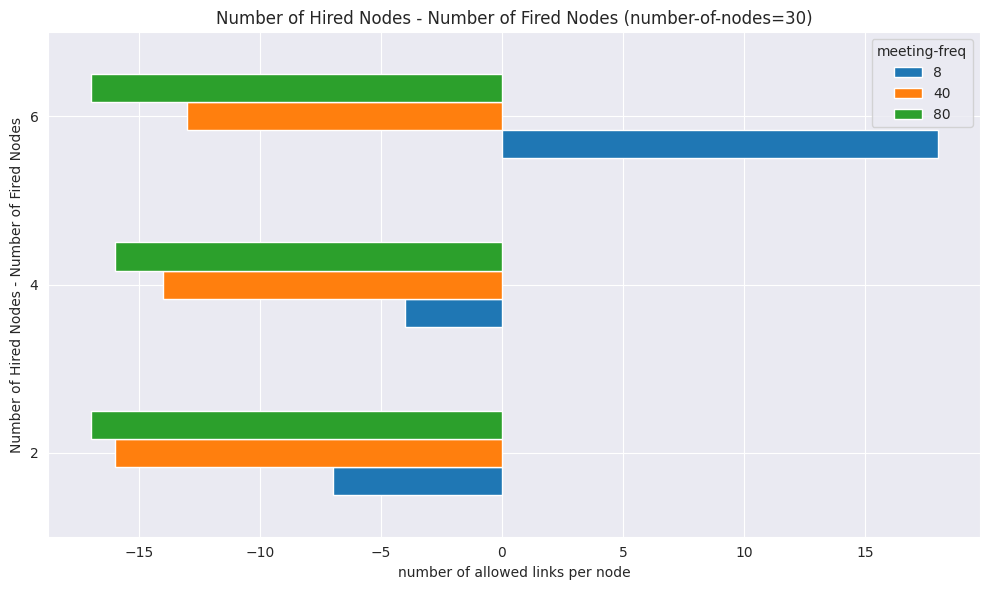

In [139]:
for val in df_1[sens_param].unique():
    df = df_1[df_1[sens_param] == val]
    plot_diff_hired_fired(df, cols_oi_1, title=f'{sens_param}={val}')

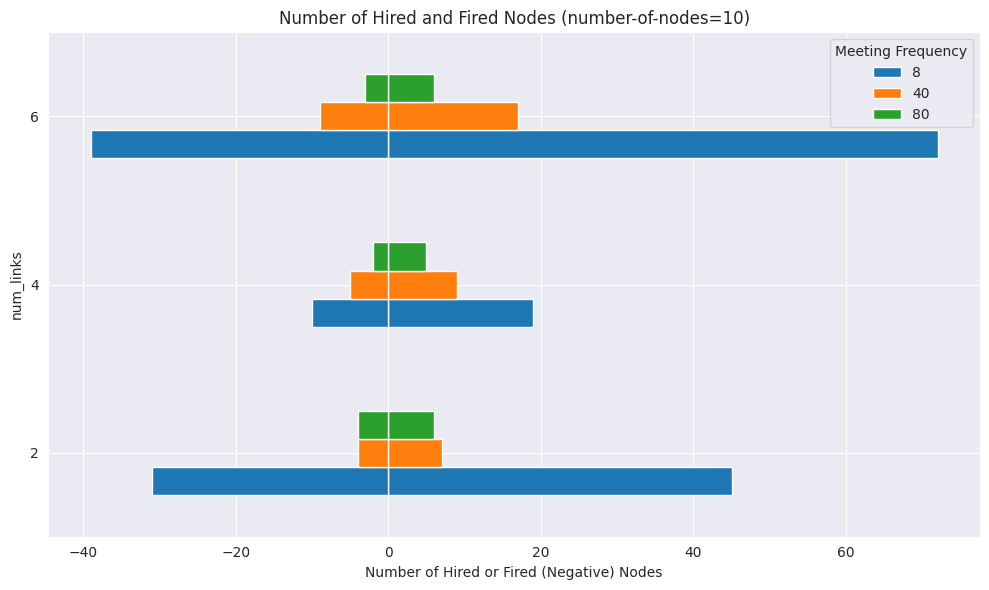

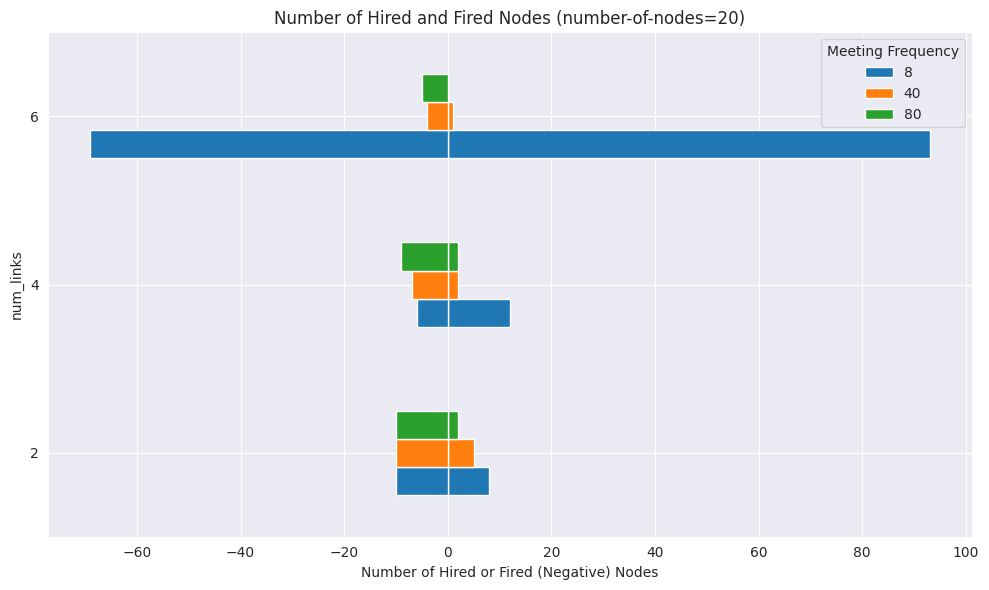

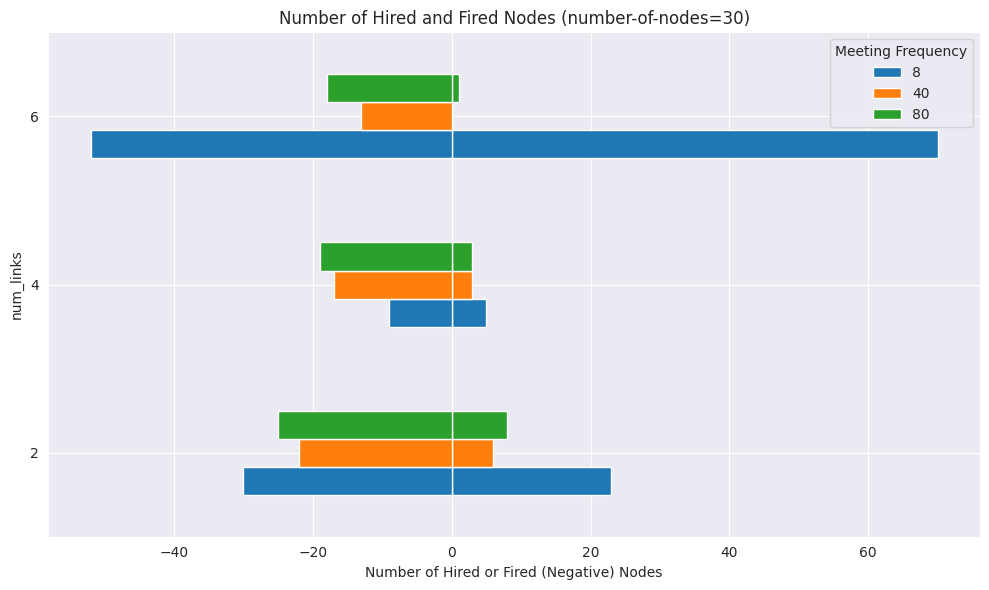

In [140]:
for val in df_1[sens_param].unique():
    df = df_1[df_1[sens_param] == val]
    plot_number_of_hired_and_fired_nodes(df, cols_oi_1, title=f'{sens_param}={val}')